In [4]:
from alignment import FaceAligner
from detection import FaceDetector
import matplotlib.pyplot as plt
from matplotlib import patches
import multiprocessing
from tqdm import tqdm
import numpy as np
import argparse
import pathlib
import cv2
import os

datasets_path = pathlib.Path.cwd() / 'datasets'
casia_path = datasets_path / 'CASIA-WebFace'
lwf_path = datasets_path / 'lfw'
processed_casia_path = datasets_path / 'CASIA-WebFace-112x96'
processed_lwf_path = datasets_path / 'lfw-112x96'
image_size = (96, 112)

face_detector = FaceDetector()
face_aligner = FaceAligner()

## Test

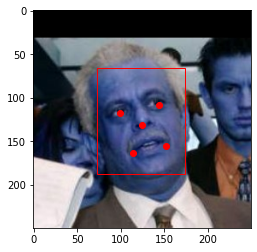

In [38]:
path = "/mnt/d/Projects/Face_Identification/sphereface_keras/datasets/lfw/Abdullah_al-Attiyah/Abdullah_al-Attiyah_0002.jpg"
image = cv2.imread(path)
det = face_detector.process(image)
keypoints, (x1, y1), (x2, y2) = det

# plot
fig, ax = plt.subplots(1)
ax.imshow(image)
plt.plot(det[0]['left_eye'][0], det[0]['left_eye'][1], 'ro')
plt.plot(det[0]['right_eye'][0], det[0]['right_eye'][1], 'ro')
plt.plot(det[0]['nose'][0], det[0]['nose'][1], 'ro')
plt.plot(det[0]['mouth_left'][0], det[0]['mouth_left'][1], 'ro')
plt.plot(det[0]['mouth_right'][0], det[0]['mouth_right'][1], 'ro')
rect = patches.Rectangle(det[1], det[2][0]-det[1][0], det[2][1]-det[1][1], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

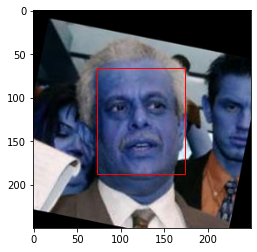

In [39]:
image_aligned = face_aligner.process_image(image, keypoints)

# plot
fig, ax = plt.subplots(1)
rect = patches.Rectangle(det[1], det[2][0]-det[1][0], det[2][1]-det[1][1], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.imshow(image_aligned)
plt.show()

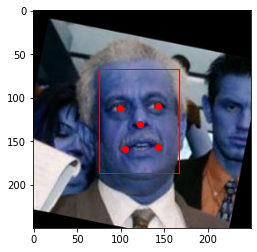

In [40]:
# Detect again
face_detector = FaceDetector()
result = face_detector.process(image_aligned)

# plot
fig,ax = plt.subplots(1)
ax.imshow(image_aligned)
plt.plot(result[0]['left_eye'][0], result[0]['left_eye'][1], 'ro')
plt.plot(result[0]['right_eye'][0], result[0]['right_eye'][1], 'ro')
plt.plot(result[0]['nose'][0], result[0]['nose'][1], 'ro')
plt.plot(result[0]['mouth_left'][0], result[0]['mouth_left'][1], 'ro')
plt.plot(result[0]['mouth_right'][0], result[0]['mouth_right'][1], 'ro')
rect = patches.Rectangle(result[1], result[2][0]-result[1][0], result[2][1]-result[1][1], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

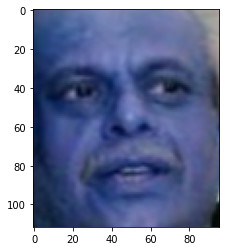

In [43]:
image_resized = image_aligned[result[1][1]:result[2][1], result[1][0]:result[2][0]]
image_resized = cv2.resize(image_resized, (96, 112), cv2.INTER_AREA)
plt.imshow(image_resized)

In [50]:
image_normalized = cv2.normalize(image_resized, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
print(image_normalized[0][0:10])

[[0.32380953 0.36666667 0.52380955]
 [0.33333334 0.37142858 0.54285717]
 [0.34761906 0.3952381  0.5809524 ]
 [0.37142858 0.41904762 0.61904764]
 [0.3809524  0.42857143 0.6333334 ]
 [0.3857143  0.42857143 0.64761907]
 [0.3952381  0.43333334 0.6666667 ]
 [0.4047619  0.44285715 0.6761905 ]
 [0.3952381  0.44285715 0.6809524 ]
 [0.3857143  0.44761905 0.6809524 ]]


In [52]:
image_normalized = (image_resized - 127.5) / 128  
print(image_normalized[0][0:10])

[[-0.46484375 -0.39453125 -0.13671875]
 [-0.44921875 -0.38671875 -0.10546875]
 [-0.42578125 -0.34765625 -0.04296875]
 [-0.38671875 -0.30859375  0.01953125]
 [-0.37109375 -0.29296875  0.04296875]
 [-0.36328125 -0.29296875  0.06640625]
 [-0.34765625 -0.28515625  0.09765625]
 [-0.33203125 -0.26953125  0.11328125]
 [-0.34765625 -0.26953125  0.12109375]
 [-0.36328125 -0.26171875  0.12109375]]


In [53]:
image_normalized = image_resized / 255  
print(image_normalized[0][0:10])

[[0.26666667 0.30196078 0.43137255]
 [0.2745098  0.30588235 0.44705882]
 [0.28627451 0.3254902  0.47843137]
 [0.30588235 0.34509804 0.50980392]
 [0.31372549 0.35294118 0.52156863]
 [0.31764706 0.35294118 0.53333333]
 [0.3254902  0.35686275 0.54901961]
 [0.33333333 0.36470588 0.55686275]
 [0.3254902  0.36470588 0.56078431]
 [0.31764706 0.36862745 0.56078431]]
